In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential

In [ ]:

IMAGE_SIZE = [224, 224]

In [ ]:
# Load the dataset
dataset_path = '/content/drive/MyDrive/animalset12'

In [ ]:
#spliting data into train, test and validation

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


image_generator = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_data = image_generator.flow_from_directory(
    dataset_path,
    subset="training",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


validation_data = image_generator.flow_from_directory(
    dataset_path,
    subset="validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 2463 images belonging to 41 classes.
Found 1971 images belonging to 41 classes.
Found 492 images belonging to 41 classes.


In [ ]:
print(len(test_generator))
print(len(train_data))

77
62


In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
 # useful for getting number of classes
folders =test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
len(folders)

Found 2463 images belonging to 41 classes.


77

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(41, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
r=model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
62/62 [==============================] - 348s 6s/step - loss: 3.7073 - accuracy: 0.0309 - val_loss: 3.6774 - val_accuracy: 0.0508
Epoch 2/5
62/62 [==============================] - 321s 5s/step - loss: 3.6422 - accuracy: 0.0518 - val_loss: 3.6669 - val_accuracy: 0.0630
Epoch 3/5
62/62 [==============================] - 309s 5s/step - loss: 3.5024 - accuracy: 0.1071 - val_loss: 3.4541 - val_accuracy: 0.1057
Epoch 4/5
62/62 [==============================] - 314s 5s/step - loss: 3.1954 - accuracy: 0.1735 - val_loss: 3.1923 - val_accuracy: 0.1870
Epoch 5/5
62/62 [==============================] - 309s 5s/step - loss: 2.5712 - accuracy: 0.3354 - val_loss: 3.1719 - val_accuracy: 0.2398


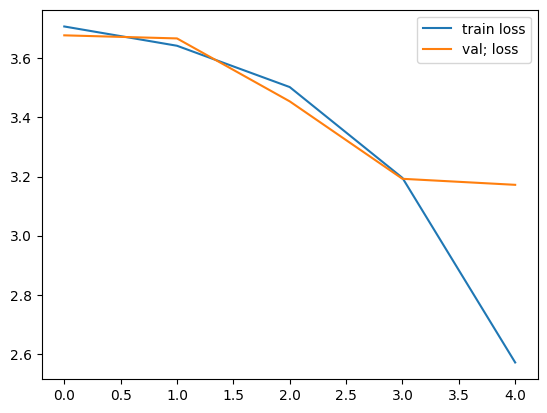

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val; loss')
plt.legend()
plt.show()

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

NameError: name 'r' is not defined

In [ ]:
model.save('AC.h5')

In [ ]:
model = tf.keras.models.load_model('./AC.h5',compile=False)

In [ ]:
import cv2
def predictor(img, model):
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = np.array(image, dtype = 'float32')/255.0
    plt.imshow(image)
    image = image.reshape(1, 224,224,3)

    label_names = train_data.class_indices
    dict_class = dict(zip(list(range(len(label_names))), label_names))
    clas = model.predict(image).argmax()
    name = dict_class[clas]
    print('The given image is of \nClass: {0} \nAnimal: {1}'.format(clas, name))

1/1 [==============================] - 0s 183ms/step
The given image is of 
Class: 1 
Animal: badger


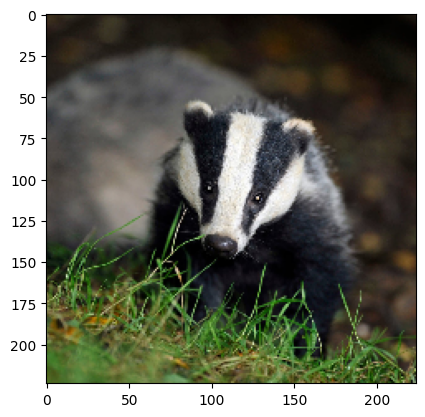

In [ ]:
predictor('/content/drive/MyDrive/animalset12/badger/00f56e5c92.jpg',model)

1/1 [==============================] - 0s 86ms/step
The given image is of 
Class: 0 
Animal: antelope


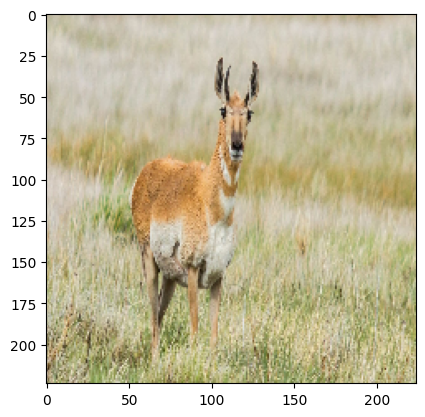

In [ ]:
predictor('/content/drive/MyDrive/animalset12/antelope/02f4b3be2d.jpg',model)

1/1 [==============================] - 0s 61ms/step
The given image is of 
Class: 21 
Animal: kangaroo


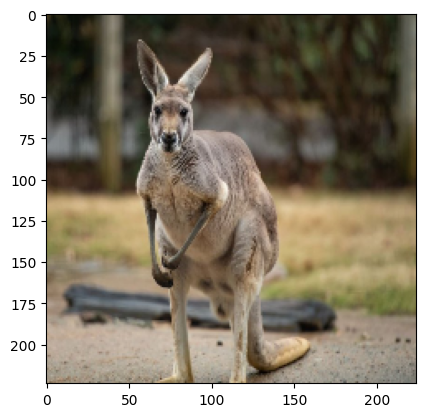

In [ ]:
predictor('/content/drive/MyDrive/kangaroo.jpg',model)

1/1 [==============================] - 0s 113ms/step
The given image is of 
Class: 2 
Animal: bat


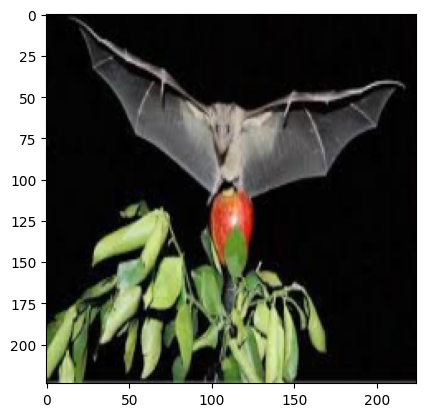

In [ ]:
predictor('/content/drive/MyDrive/animalset12/bat/003bd60fa9.jpg',model)

1/1 [==============================] - 0s 86ms/step
The given image is of 
Class: 2 
Animal: bat


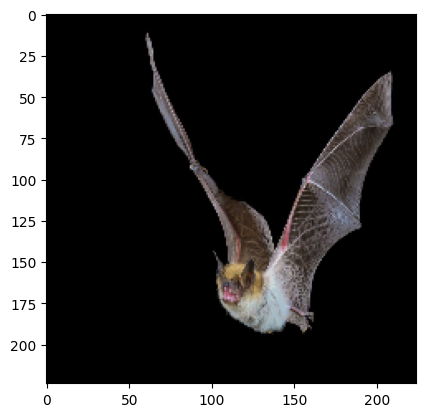

In [ ]:
predictor('/content/drive/MyDrive/animalset12/bat/0315a4b6b7.jpg',model)